# 1) Diseño filtro de Filtro de Maxima Planicidad:

## Requisitos de plantilla:

$$
\alpha max = 1dB	;500Hz
$$

$$
\alpha min = 18dB	 ;1500Hz
$$

## Cálculo de ϵ y N

Tras haber aplicado una norma de frecuencia $$ N_{\Omega_1} = 2 \pi 500Hz$$



$$
αmax = 1dB	;wp=1
$$

$$
αmin = 18dB	 ;ws=3
$$

Entonces, a partir de la expresión de la transferencia de la cual conocemos dos valores de w y dos valores del módulo de la atenuación, vamos a despejar los parámetros del filtro. Comencemos por $wp=1$


$$\alpha_{max} = 20 log(\sqrt{1 + \epsilon^2 w_p^{2N}})$$
$$\alpha_{max} = 10 log(1 + \epsilon^2 w_p^{2N})$$
$$\frac{\alpha_{max}}{10} = log(1 + \epsilon^2 w_p^{2N})$$
$$10^{0.1\alpha_{max}} - 1 = \epsilon^2$$
$$\epsilon = \sqrt{10^{0.1\alpha_{max}} - 1}$$


In [3]:
import math as m

alpha_max = 1    # dB
alpha_min = 18   # dB
w_p = 1
w_s = 3
epsilon = m.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
print(epsilon)


0.5088471399095875


Proseguimos con el cálculo de N. De forma similar, utilizaremos la misma expresión pero evaluada en $ws=4$. Resulta:

$$\alpha_{min} = 20 log(\sqrt{1 + \epsilon^2 w_s^{2N}})$$
$$\alpha_{min} = 10 log(1 + \epsilon^2 w_s^{2N})$$
$$\frac{10^{0.1\alpha_{min}} - 1}{10^{0.1\alpha_{max}} - 1} = w_s^{2N}$$
$$log(\frac{10^{0.1\alpha_{min}} - 1}{10^{0.1\alpha_{max}} - 1}) = 2N log(w_s)$$
$$N = \frac{log(\frac{10^{0.1\alpha_{min}} - 1}{10^{0.1\alpha_{max}} - 1})}{2 log(w_s)}$$



In [11]:
N = m.log10((m.pow(10, alpha_min * 0.1) - 1) / (m.pow(10, alpha_max * 0.1) - 1)) / (2 * m.log10(w_s))
N = m.ceil(N)
N

3

###### Como la condicion del problema es que el filtro sea de orden 2 , NO es posible obvtener dicho filtro modulo de transferencia de Maxima planicidad , ya que N>2

# 2) Diseño filtro de Filtro de Maxima Planicidad:

## Requisitos de plantilla:

$$
\alpha max = 1dB	;500Hz
$$

$$
\alpha min = 18dB	 ;1500Hz
$$

## Cálculo de ϵ y N

Tras haber aplicado una norma de frecuencia $$ N_{\Omega_1} = 2 \pi 500Hz$$



$$
αmax = 1dB	;wp=1
$$

$$
αmin = 18dB	 ;ws=3
$$

$$\alpha_{max} = 20 log(\sqrt{1 + \epsilon^2 w_p^{2N}})$$
$$\alpha_{max} = 10 log(1 + \epsilon^2 w_p^{2N})$$
$$\frac{\alpha_{max}}{10} = log(1 + \epsilon^2 w_p^{2N})$$
$$10^{0.1\alpha_{max}} - 1 = \epsilon^2$$
$$\epsilon = \sqrt{10^{0.1\alpha_{max}} - 1}$$


In [4]:
import math as m

alpha_max = 1    # dB
alpha_min = 18   # dB
w_p = 1
w_s = 3
epsilon = m.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
print(epsilon)



0.5088471399095875


Proseguimos con el cálculo de N. De forma similar, utilizaremos la misma expresión pero evaluada en $ws=4$. Resulta:

$$\alpha_{min} = 20 log(\sqrt{1 + \epsilon^2 C^2 (N, w_s)})$$

$$\sqrt{\frac{10^{0.1\alpha_{min}} - 1}{10^{0.1\alpha_{max}} - 1}} = cosh(N acosh( w_s ))$$

$$N = \frac{acosh \left( \sqrt{\frac{10^{0.1\alpha_{min}} - 1}{10^{0.1\alpha_{max}} - 1}} \right )}{acosh( w_s )}$$

In [6]:
N = m.acosh(m.sqrt((m.pow(10, alpha_min * 0.1) - 1) / (m.pow(10, alpha_max * 0.1) - 1))) / m.acosh(w_s)
print(m.ceil(N))

2


###### Como la condicion del problema es que el filtro sea de orden 2 , Es posible obvtener dicho filtro con modulo de transferencia de Chebyshev , ya que N=2

## Cálculo de los coeficientes del polinomio del filtro


Las funciones armónicas de Chebyshev pueden ser expresadas por equivantes polinómicos que siguen una forma recursiva de serie:

$$C(N,w) = 2 w C(N-1,w) - C(N-2, w)$$ 

$$C(0,w) = 1$$ $$C(1,w) = w$$

y dado que N=2 $$C(2, w) = 2 w^2 - 1$$

Con esto podemos calcular el modulo de la transferencia , sabiendo que $s=jw$

$$|H_{(jw)}|^2 = H_{(jw)} H^*_{(jw)} = H_{(s)} H_{(-s)} |s=jw$$

$$|H_{(w)}|^2 = \frac{1}{1 + \epsilon^2 (2w^2 - 1)^2} = H_{(s)} H_{(-s)} |s=jw$$

$$|H_{(w)}|^2 = \frac{1}{ 1.03226 w^4 - 1.03226 w^2 + 1.25806 }$$

$$ H_{(s)} H_{(-s)} = \frac{1}{(s^2 + as + b)(s^2 - as + b)} $$

In [14]:
import numpy as np
num = [1]
den = [1.03226,0,1.03226,0,1.25806]
roots = np.roots(den)
print(roots)

[-0.5495303+0.89553534j -0.5495303-0.89553534j  0.5495303+0.89553534j
  0.5495303-0.89553534j]


In [16]:
polo = roots[0]  # T(S)
Real = polo.real
w0_polo = abs(polo)    
print(f's^2+{-2*Real}*s+{w0_polo ** 2}')

s^2+1.0990605914468325*s+1.1039670918357307


In [20]:
num_final=[1]
den_final=[1,1.0990605914468325,1.1039670918357307]

Entonces la transferencia es igual a : $$H_{(s)}=\frac{1}{(s^2+1.0990605914468325s+1.1039670918357307)}$$

In [22]:
import numpy as np
raices = np.roots(den_final)
raices

array([-0.5495303+0.89553534j, -0.5495303-0.89553534j])

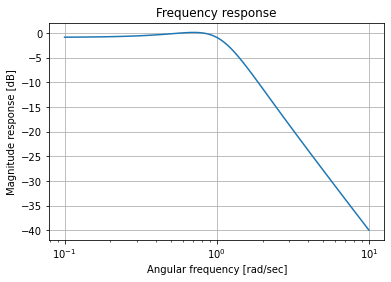

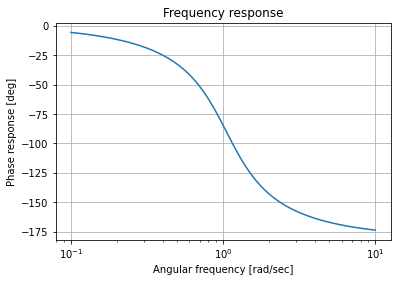

In [26]:
import scipy.signal as signal
import splane

filtro = signal.TransferFunction(num_final, den_final)

splane.bodePlot(filtro)

0 zeros: []
2 poles: [-0.5495303+0.89553534j -0.5495303-0.89553534j]
gain: 1.0


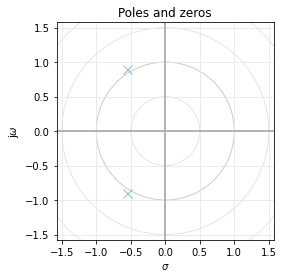

In [27]:
splane.pzmap(filtro)

## Calculo de componentes para el filtro Ackerberg-Mossberg

In [40]:
Nr = 1000 
Nw = 500*2*3.14159265358

R1 = 1
R2 = 1
R3 = 1.1
R5 = 1
RK = 1
RQ = 0.9
C1 = 1
R11 = R1 * Nr
R21 = R2 * Nr
R31 = R3 * Nr
R51 = R5 * Nr
R_Q = RQ * Nr
R_K = RK * Nr
C11 = C1 / Nr / Nw

print(R11,R21,R31,R51,R_Q,R_K,C11)

1000 1000 1100.0 1000 900.0 1000 3.1830988618478294e-07


![](d1.png)

![](d2.png)

![](d4.png)


## Viendo la simulacion , podemos decir que cumple con la plantilla propuesta y es un filtro valido para el trabajo